# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [2]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

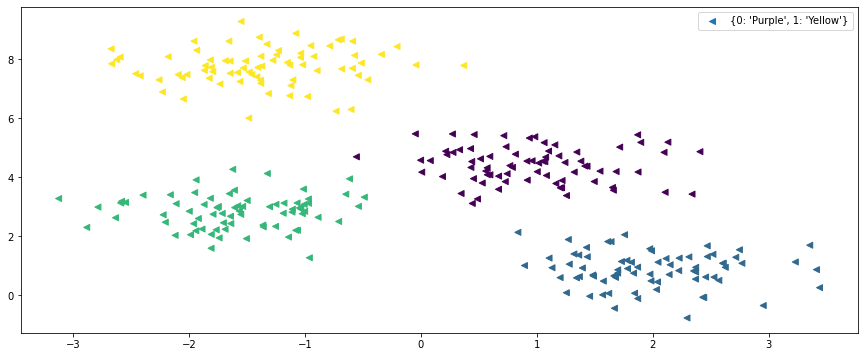

In [20]:
# 3 points

#make the dataset with make_blobs use random state 0 use 300 samples
#And plot it
X = 0
Y = 0
# YOUR CODE HERE
(X, Y) = make_blobs(n_samples =300,
                   n_features = 2,
                   centers = 4,
                   cluster_std = 0.6,
                   random_state =0
                  )
(i,j) = X[:,0],X[:,1]
label = {0 :"Purple",1 :"Yellow" }
plt.figure(figsize=(15,6))
plt.scatter(i,j,marker='<',c=Y,label=label)
plt.legend()

In [4]:
assert X.shape== (300,2)
assert Y.shape== (300,)

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```, it should give the same result as the previous 2 combined.
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [5]:
# 3 points

#implement square diff
# your code here

def square_diff(v1, v2):
    # YOUR CODE HERE
    sq_diff = (v1-v2)**2 
    return sq_diff


In [6]:

assert square_diff(X[0],X[1]).shape==(2,) 


assert square_diff(X[0],X[0])[0]== 0
assert square_diff(X[0],X[0])[1]== 0 

assert abs(square_diff(X[0],X[1])[0] - 5.06) < 0.05
assert abs(square_diff(X[0],X[1])[1]-  27.80) < 0.05


assert abs(square_diff(X[0],X[100])[0] - 2.03) < 0.05
assert abs(square_diff(X[0],X[100])[1]-  41.96) < 0.05



assert abs(square_diff(X[200],X[256])[0]- 3.30 ) < 0.05
assert abs(square_diff(X[200],X[256])[1]- 0.09 ) < 0.05

In [7]:
# 2 points
#implement root sum squares
#your code here
def root_sum_squared(v1):
    # YOUR CODE HERE
    root_sum = np.sqrt(np.sum(v1))
    return root_sum

In [8]:
v1 = root_sum_squared(square_diff(X[0],X[0]))
v2 = root_sum_squared(square_diff(X[0],X[1]))
v3 = root_sum_squared(square_diff(X[0],X[100]))
v4 = root_sum_squared(square_diff(X[200],X[256]))


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [9]:
# YOUR CODE HERE
def euclidean_distances(v1,v2):
    euc_dist = np.linalg.norm(v1-v2)
    return euc_dist

In [10]:
v1 = euclidean_distances(X[0],X[0])
v2 = euclidean_distances(X[0],X[1])
v3 = euclidean_distances(X[0],X[100])
v4 = euclidean_distances(X[200],X[256])


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [11]:
# 3 points

#implement the evaluate function RETURN THE A VALUE BETWEEN 0 AND 1
#your code here
#This cell will be evaluated later on
def evaluate(y, y_p):
    # YOUR CODE HERE
    
    x = y.shape[0]
    l = np.zeros((x,))
    for i in range(x):
        ev = 0
        if y[i] == y_p[i]:
           ev = 1
        l[i]=ev
    return np.sum(l)/x
    

In [12]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([1,2,2])
d = np.array([2,2,2])

assert evaluate(a,b) == 1
assert 0.66 <= evaluate(a,c) <= 0.667
assert 0.33 <= evaluate(a,d) <= 0.34

### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [58]:
# 10 points
#Implement the KNN function that predicts the class for the test values using the train values
#your code here
#OUTPUT MUST BE A NP ARRAY
def predict(x_test,x_train,y_train, k=3):
    m = x_test.shape[0] # 60
    n = x_train.shape[0] # 240
    vote = np.zeros(m)
    #print(m)
    for i in range(m):
        dist = np.zeros((n,2))
        test = x_test[i]
        #print(test)
        for j in range(n):
            train = x_train[j]
            #print(j)
            dist[j,0] = euclidean_distances(train,test)
            dist[j,1] = y_train[j]
        #print(dist)
        filter_dist = np.sort(dist[:,0])
        filter_dist = filter_dist[:k]
        #print(filter_dist)
        for f in filter_dist:
            neigh = np.where(dist[:,0] == f)
            n_arr = dist[neigh][:,1]
            
            #print(n_arr)
        vote_n = np.mean(n_arr)
        vote[i] = round(vote_n)
    print(vote)
    return vote         
#predictions = predict(x_train, y_train,x_test, k=3)

In [59]:
#1 point
from sklearn.model_selection import train_test_split
#tested with random state 0
#create the train test split test_size 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
# YOUR CODE HERE
#print(evaluate(predictions, y_test))
#print(evaluate(predictions, y_test) >= 0.95)

In [60]:
assert x_train.shape == (240,2)
assert x_test.shape == (60,2)
assert y_train.shape == (240,)
assert y_test.shape == (60,)

In [61]:
predictions = predict(x_test,x_train, y_train, k=3)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


[0. 1. 3. 2. 1. 3. 2. 1. 3. 1. 2. 1. 1. 3. 2. 2. 0. 1. 3. 2. 2. 1. 3. 0.
 2. 1. 3. 2. 0. 1. 3. 0. 0. 2. 0. 2. 0. 2. 0. 3. 0. 3. 0. 0. 0. 1. 0. 1.
 3. 2. 3. 3. 0. 0. 3. 1. 0. 3. 3. 0.]


In [62]:
# Extra point
predictions = predict(x_test,x_train, y_train, k=2)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


[0. 1. 3. 2. 1. 3. 2. 1. 3. 1. 2. 1. 1. 3. 2. 2. 0. 1. 3. 2. 2. 1. 3. 0.
 2. 1. 3. 2. 0. 1. 3. 0. 0. 2. 0. 2. 0. 2. 0. 3. 0. 3. 0. 0. 0. 1. 0. 1.
 3. 2. 3. 3. 0. 0. 3. 1. 0. 3. 3. 0.]


In [63]:
print('Accuracy {:0.2f}%'.format( evaluate(predictions, y_test)*100 ))

Accuracy 100.00%
